## ITESS_TICS_ASYSC
## AGOSTO-DICIEMBRE
## DOCENTE: FRANCISCO JAVIER MONTECILLO PUENTES
## PROGRAMADOR: ISAAC ORTIZ ARIAS
## 13 NOVIEMBRE 2025

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import CosSignal, SinSignal, decorate

class VisualizadorFourier:
    def __init__(self):
        self.coeficientes = []
        self.T = 1
        self.k = 1
        
    def configurar(self, T, coeficientes, k=1):
        self.T = T
        self.k = k
        self.coeficientes = coeficientes
        print(f" Señal configurada: T={T}s, k={k}")
        print(f" Coeficientes: {coeficientes}")
        
    def generar_aproximacion(self, n_terminos, N_ciclos=3):
        f = 1 / self.T
        coef_parcial = self.coeficientes[:n_terminos]
        
        a0 = coef_parcial[0] if len(coef_parcial) > 0 else 0
        señal_aproximada = CosSignal(freq=0, amp=a0, offset=0).make_wave(duration=self.T * N_ciclos)
        
        for n, an in enumerate(coef_parcial[1:], 1):
            if an != 0:
                armónico = CosSignal(freq=n * f, amp=an, offset=0).make_wave(duration=self.T * N_ciclos)
                señal_aproximada.ys += armónico.ys
        
        return señal_aproximada
    
    def visualizar(self, N_ciclos=3, titulo="Aproximación de Fourier", señal_real=None):
        if not self.coeficientes:
            print("Primero configura los coeficientes!")
            return
            
        n_graficas = min(6, len(self.coeficientes))
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        axs = axs.flatten()
        
        for i in range(n_graficas):
            n_terminos = i + 1
            señal_aprox = self.generar_aproximacion(n_terminos, N_ciclos)
            
            axs[i].plot(señal_aprox.ts, señal_aprox.ys, 'b-', linewidth=2, label=f'{n_terminos} término(s)')
            
            if señal_real is not None:
                t = np.linspace(0, self.T * N_ciclos, 1000)
                señal_real_vals = señal_real(t)
                axs[i].plot(t, señal_real_vals, 'r--', alpha=0.7, label='Señal real')
            
            axs[i].set_title(f'{n_terminos} término(s)')
            axs[i].grid(True, which='both', alpha=0.3)
            axs[i].legend()
        
        plt.suptitle(titulo, fontweight='bold')
        plt.tight_layout()
        plt.show()

viz = VisualizadorFourier()

$$ v(t) = \frac{\pi V}{2} + V \sin(\omega t) - \frac{2V}{3\pi} \cos(2\omega t) - \frac{2V}{15\pi} \cos(4\omega t) + \cdots $$

 Señal configurada: T=6.283185307179586s, k=1
 Coeficientes: [0.3183098861837907, 0.5, -0.2122065907891938, 0, -0.04244131815783876]


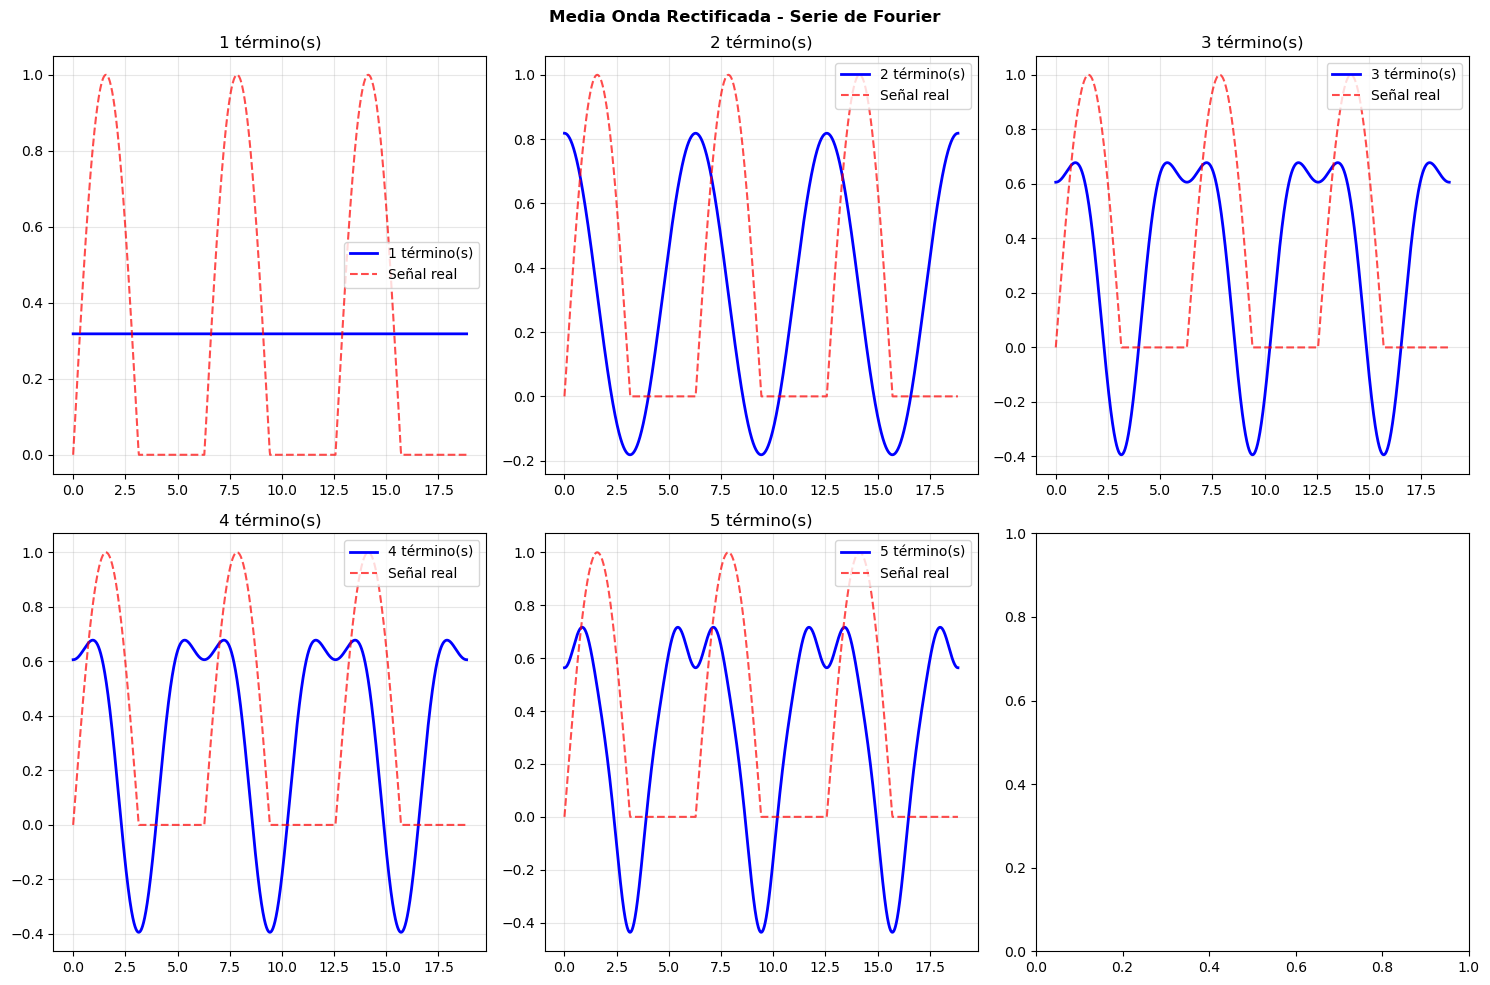

In [11]:
#  EJERCICIO 1 - MEDIA ONDA RECTIFICADA

T = 2 * np.pi           # Periodo fundamental
k = 1                   # Amplitud

coeficientes = [        # [a0, a1, a2, a3, a4, ...]
    1/np.pi,            # a0 -> componente DC
    0.5,                # a1 -> primer armónico (seno)
    -2/(3*np.pi),       # a2 -> cos(2ωt)
    0,                  # a3
    -2/(15*np.pi),      # a4 -> cos(4ωt)
]

def señal_real(t):
    """Media onda rectificada"""
    resultado = np.sin(t)
    resultado[resultado < 0] = 0
    return resultado

titulo = "Media Onda Rectificada - Serie de Fourier"

viz.configurar(T, coeficientes, k)
viz.visualizar(titulo=titulo, señal_real=señal_real)


$$ v(t) = -\frac{\pi V}{2} + \frac{4V}{3\pi} \cos(\omega t) - \frac{4V}{15\pi} \cos(2\omega t) + \cdots $$

 Señal configurada: T=6.283185307179586s, k=1
 Coeficientes: [-0.6366197723675814, 0.4244131815783876, -0.08488263631567752, 0, 0.03637827270671894]


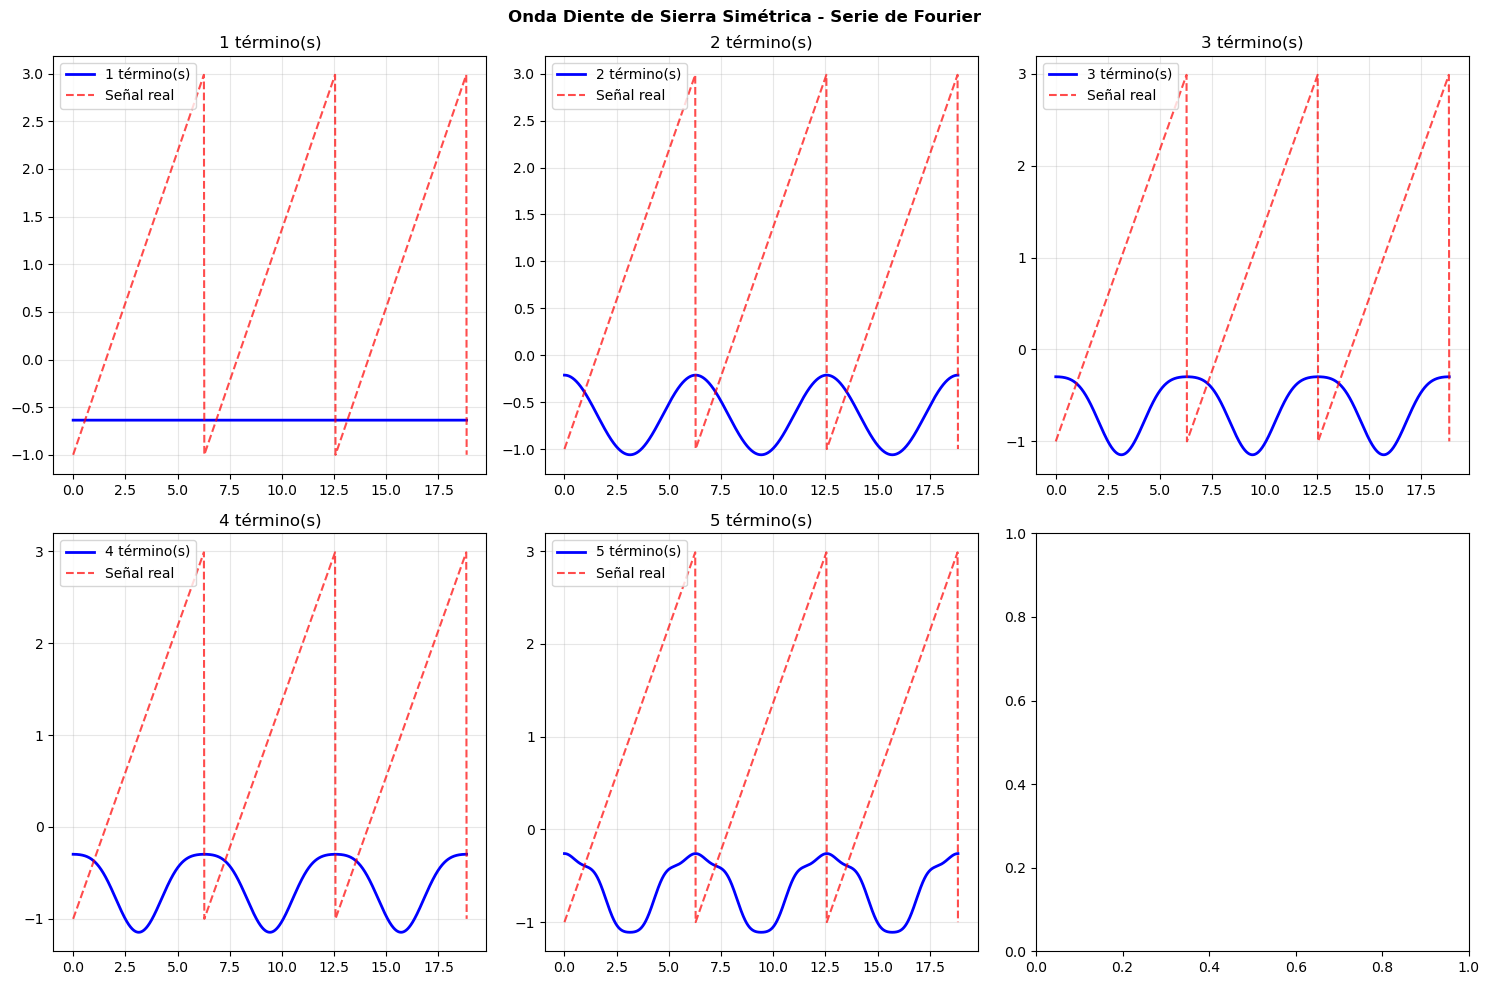

In [12]:
#  EJERCICIO 2 - ONDA DIENTE DE SIERRA SIMÉTRICA

T = 2 * np.pi           # Periodo fundamental
k = 1                   # Amplitud

coeficientes = [        # [a0, a1, a2, a3, a4, ...]
    -2/np.pi,           # a0 -> componente DC
    4/(3*np.pi),        # a1 -> cos(ωt)
    -4/(15*np.pi),      # a2 -> cos(2ωt)
    0,                  # a3
    4/(35*np.pi),       # a4 -> cos(3ωt)
]

def señal_real(t):
    """Onda diente de sierra simétrica"""
    return (2/np.pi) * (t % (2*np.pi)) - 1  # señal lineal que sube de -1 a 1 periódicamente

titulo = "Onda Diente de Sierra Simétrica - Serie de Fourier"

viz.configurar(T, coeficientes, k)
viz.visualizar(titulo=titulo, señal_real=señal_real)


$$ v(t) = \frac{4V}{\pi} \sin(\omega t) + \frac{4V}{3\pi} \sin(3\omega t) + \frac{4V}{5\pi} \sin(5\omega t) + \cdots $$

 Señal configurada: T=6.283185307179586s, k=1
 Coeficientes: [0.0, 1.2732395447351628, 0.0, 0.4244131815783876, 0.0, 0.25464790894703254, 0.0, 0.18189136353359467]


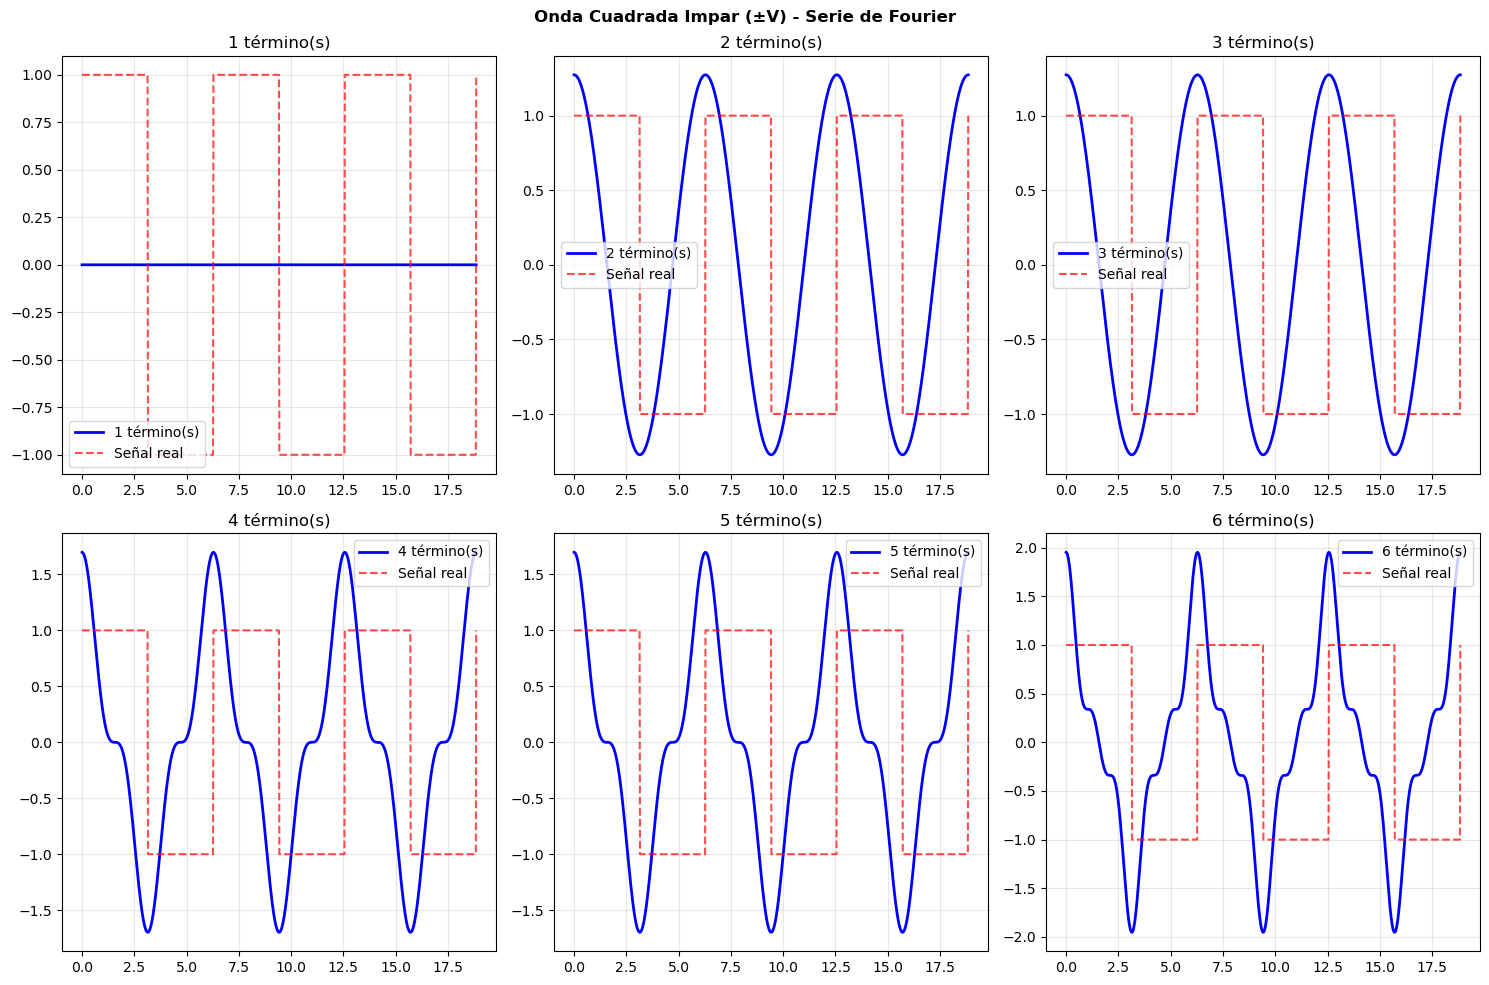

In [13]:
#  EJERCICIO 3 - ONDA CUADRADA IMPAR (±V)

T = 2 * np.pi           # Período fundamental (ω = 1)
k = 1                   # Amplitud V=1 (ajusta si quieres otra V)

# Formato de coeficientes: [a0, b1, a2, b3, a4, b5, ...]
# donde a0 = componente DC, b_n corresponde al seno del n-ésimo armónico.
# Para onda cuadrada impar: a0 = 0, b_n = 4V/(nπ) solo para n impar; pares = 0.
coeficientes = [
    0.0,                  # a0 -> DC (0 porque la señal es impar)
    4/(1*np.pi),          # b1 -> coef. seno del armónico 1 (4V/(1π))
    0.0,                  # a2 (coseno 2) = 0
    4/(3*np.pi),          # b3 -> coef. seno del armónico 3 (4V/(3π))
    0.0,                  # a4 = 0
    4/(5*np.pi),          # b5 -> coef. seno del armónico 5
    0.0,                  # a6 = 0
    4/(7*np.pi)           # b7 -> coef. seno del armónico 7 (agrega más si quieres)
]

def señal_real(t):
    """Onda cuadrada simétrica ±V (V = k).
       Aquí definimos una onda ±k con periodo T=2π y duty 50%."""
    # Normalizamos tiempo al período T=2π para facilitar:
    tt = np.mod(t, T)
    # Señal: +k en [0, T/2), -k en [T/2, T)
    resultado = np.where(tt < (T/2),  k, -k)
    return resultado

titulo = "Onda Cuadrada Impar (±V) - Serie de Fourier"

viz.configurar(T, coeficientes, k)
viz.visualizar(titulo=titulo, señal_real=señal_real)


$$ v(t) = \frac{4V}{\pi} \cos(\omega t) - \frac{4V}{3\pi} \cos(3\omega t) + \frac{4V}{5\pi} \cos(5\omega t) - \cdots $$

 Señal configurada: T=6.283185307179586s, k=1
 Coeficientes: [0.0, 1.2732395447351628, 0.0, -0.4244131815783876, 0.0, 0.25464790894703254, 0.0, -0.18189136353359467]


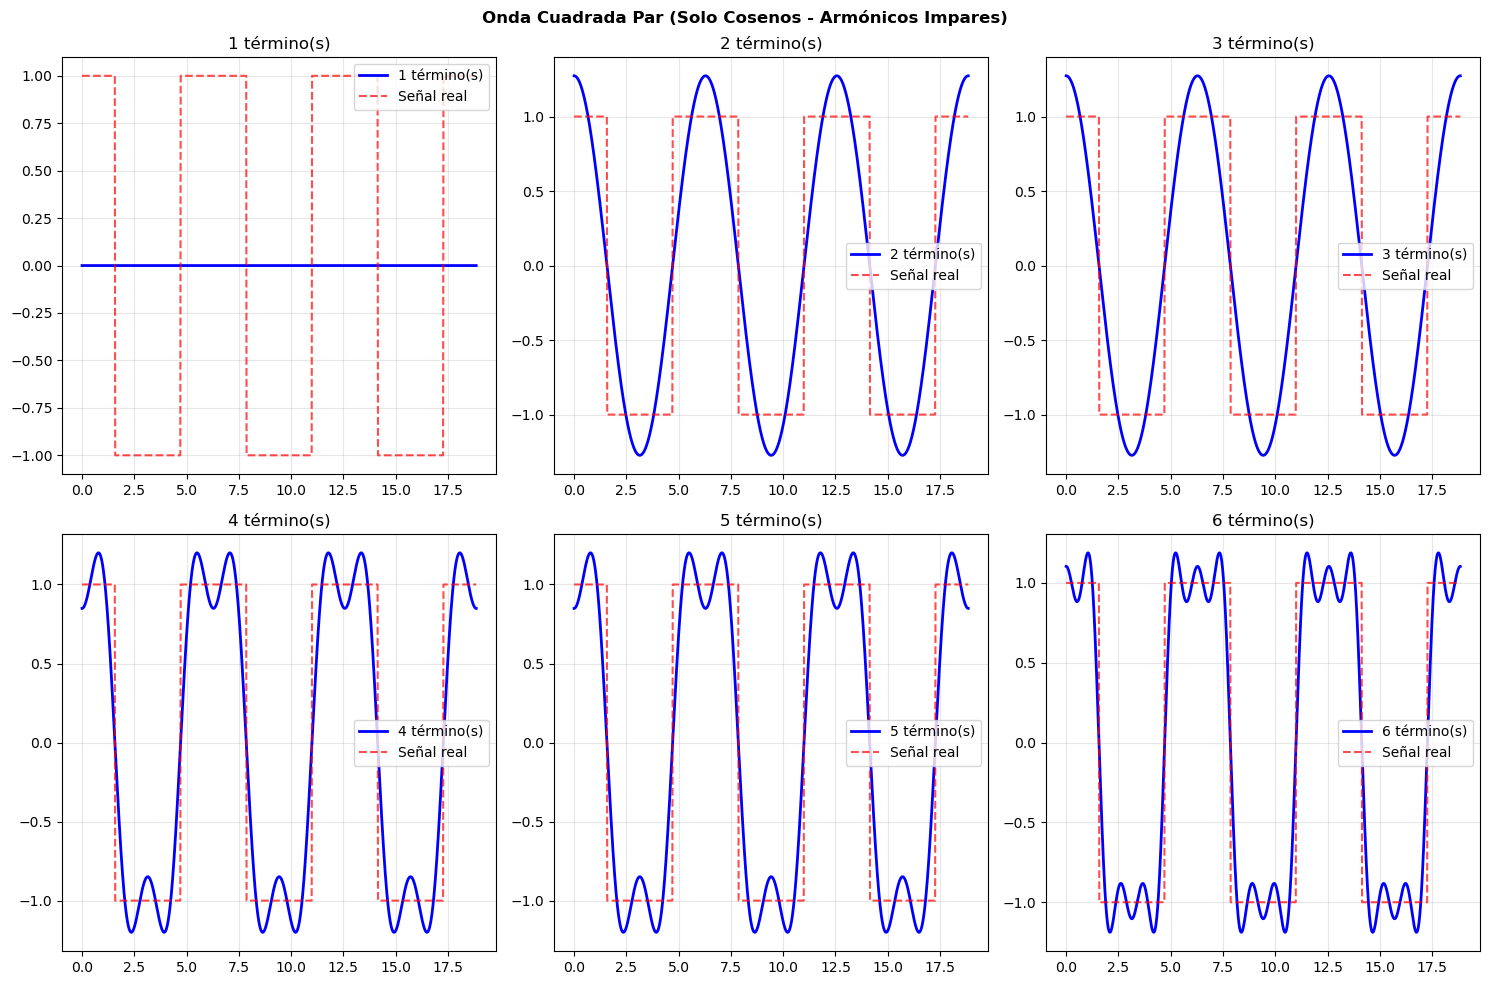

In [14]:
#  EJERCICIO 4 - ONDA CUADRADA PAR (solo cosenos, armónicos impares)

T = 2 * np.pi           # Período fundamental
k = 1                   # Amplitud V = 1

coeficientes = [        # [a0, a1, a2, a3, a4, ...]
    0.0,                  # a0 -> componente DC (0 porque es simétrica)
    4/(1*np.pi),          # a1 -> cos(ωt)
    0.0,                  # a2
    -4/(3*np.pi),         # a3 -> cos(3ωt)
    0.0,                  # a4
    4/(5*np.pi),          # a5 -> cos(5ωt)
    0.0,                  # a6
    -4/(7*np.pi)          # a7 -> cos(7ωt)
]

def señal_real(t):
    """Onda cuadrada par (simétrica en el eje vertical, ±V)"""
    tt = np.mod(t, T)
    # desplazamiento de media onda para que sea par
    resultado = np.where(np.cos(tt) >= 0, k, -k)
    return resultado

titulo = "Onda Cuadrada Par (Solo Cosenos - Armónicos Impares)"

viz.configurar(T, coeficientes, k)
viz.visualizar(titulo=titulo, señal_real=señal_real)


$$ v(t) = \frac{V\tau}{T} + \sum_{n=1}^{\infty} \left( \frac{2V}{n\pi} \frac{\sin(n\pi\tau/T)}{n\pi\tau/T} \right) \cos(n\omega_0 t) $$

 Señal configurada: T=6.283185307179586s, k=1
 Coeficientes: [0.16666666666666666, np.float64(0.31830988618379064), 0.0, np.float64(0.27566444771089604), 0.0, np.float64(0.2122065907891938), 0.0, np.float64(0.13783222385544802), 0.0, np.float64(0.06366197723675818), 0.0, np.float64(1.299390610839792e-17), 0.0, np.float64(-0.04547284088339864), 0.0, np.float64(-0.068916111927724), 0.0, np.float64(-0.0707355302630646), 0.0, np.float64(-0.05513288954217923), 0.0]


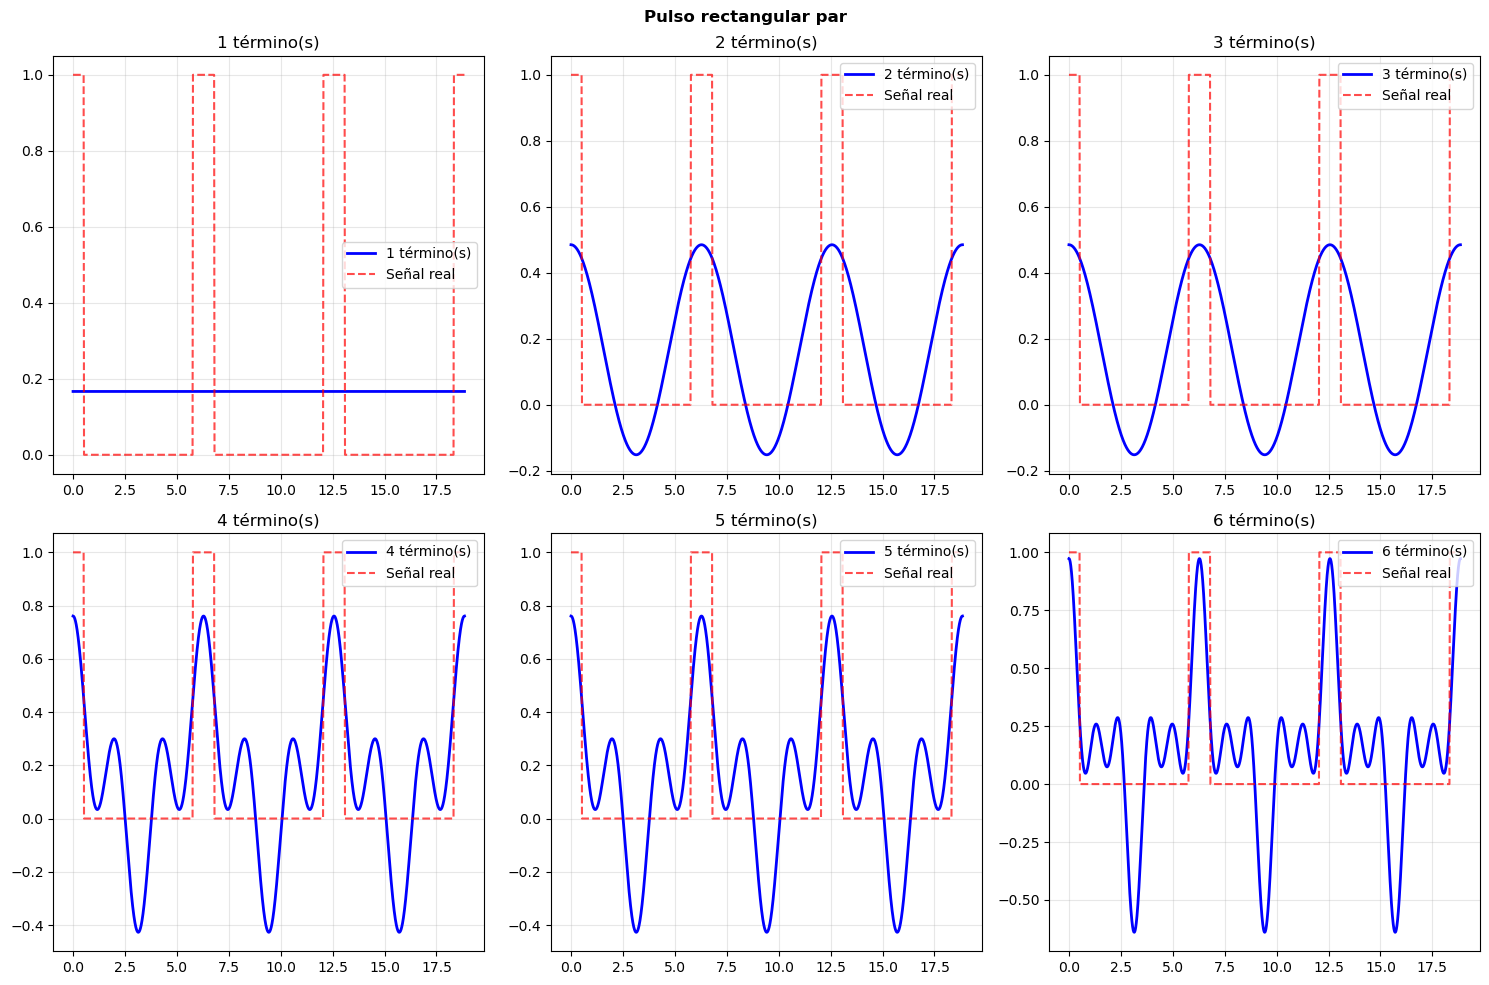

In [15]:
# EJERCICIO 5 - Señal rectangular par

T = 2 * np.pi   # periodo
V = 1           # amplitud
tau = np.pi/3   # ancho del pulso

# coeficientes
N_max = 10
a0 = V * tau / T
coeficientes = [a0]

for n in range(1, N_max+1):
    a_n = (2 * V / (n * np.pi)) * np.sin(n * np.pi * tau / T)
    coeficientes.append(a_n)
    coeficientes.append(0.0)  # no hay senos

def señal_real(t):
    """Pulso rectangular par: +V entre -tau/2 y +tau/2"""
    tt = np.mod(t + T/2, T) - T/2  # centramos el periodo
    return np.where(np.abs(tt) <= tau/2, V, 0)

titulo = "Pulso rectangular par"
viz.configurar(T, coeficientes, V)
viz.visualizar(titulo=titulo, señal_real=señal_real)


$$ v(t) = -\sum_{N=impares}^{\infty} \frac{8V}{(N\pi)^2} \cos(N\omega_0 t) $$

 Señal configurada: T=6.283185307179586s, k=1
 Coeficientes: [0, -0.8105694691387022, 0.0, 0, 0.0, -0.09006327434874468, 0.0, 0, 0.0, -0.03242277876554809, 0.0, 0, 0.0, -0.016542234064055146, 0.0, 0, 0.0, -0.010007030483193855, 0.0]


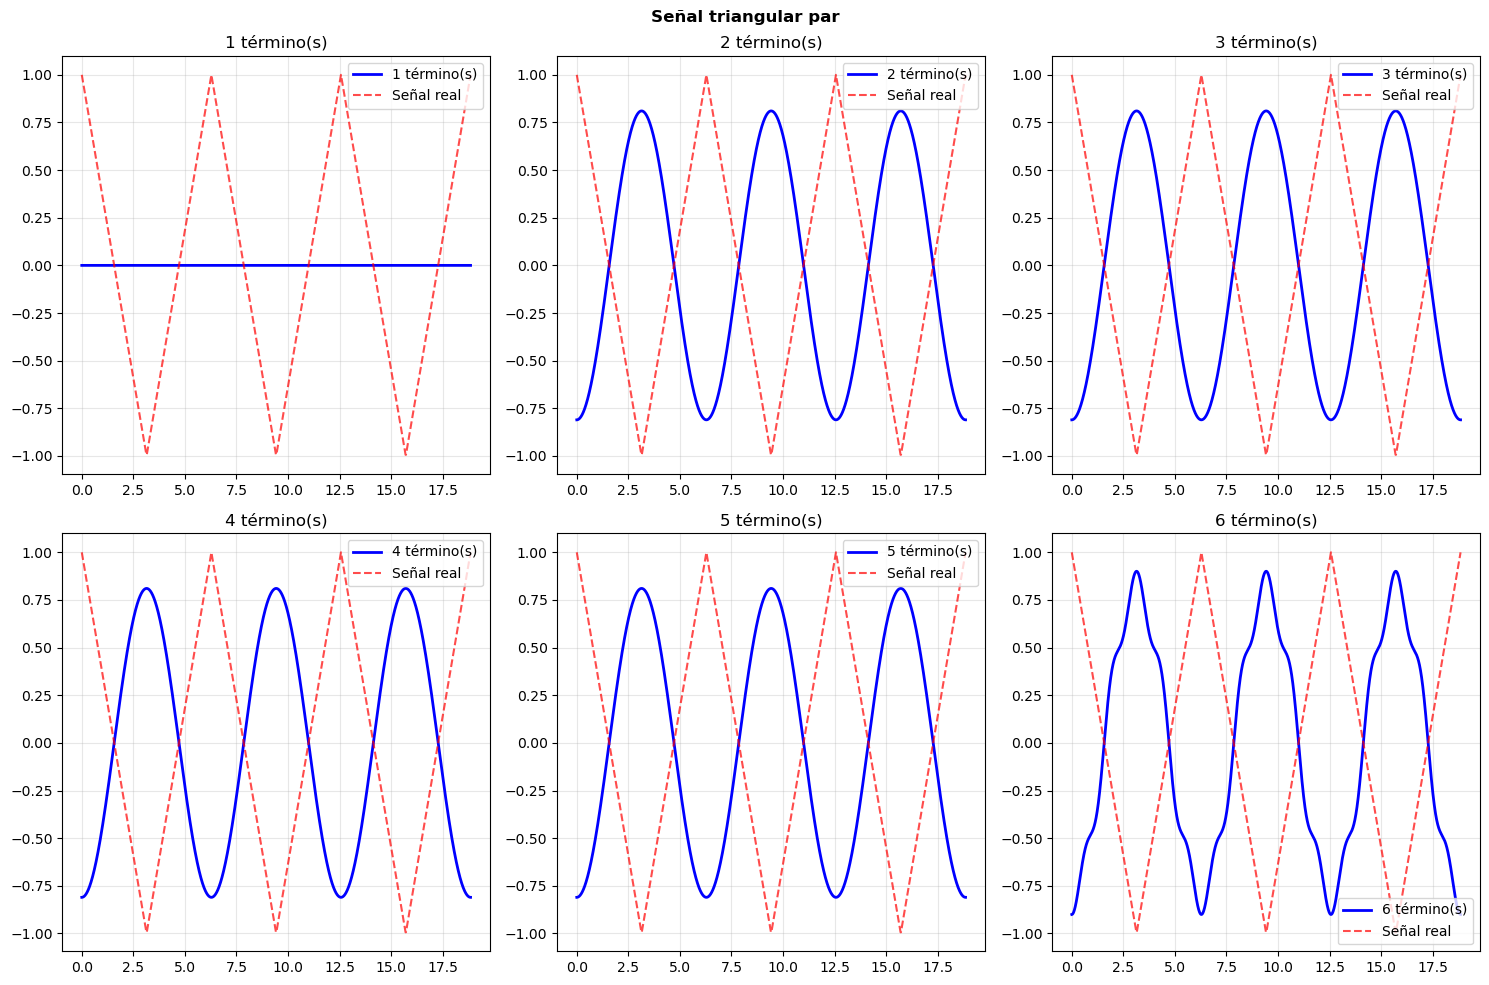

In [17]:
#  EJERCICIO 6 - Señal triangular par

T = 2 * np.pi
V = 1
N_max = 9   # usa armónicos impares hasta 9

a0 = 0
coeficientes = [a0]

for n in range(1, N_max+1):
    if n % 2 == 1:  # solo impares
        a_n = -8 * V / ((n * np.pi)**2)
    else:
        a_n = 0
    coeficientes.append(a_n)
    coeficientes.append(0.0)  # no hay senos

def señal_real(t):
    """Triangular par (va de +V a -V)"""
    tt = np.mod(t, T)
    # construimos una triangular que sube y baja
    return (4*V/T)*np.abs(tt - T/2) - V

titulo = "Señal triangular par"
viz.configurar(T, coeficientes, V)
viz.visualizar(titulo=titulo, señal_real=señal_real)
